<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Citzen Science Notebook</b> <br>
Contact author: Clare Higgs & Eric Rosas <br>
Last verified to run: 2022-10-20 <br>
LSST Science Piplines version: Weekly 2022_40 <br>
Container size: medium <br>


## Table of Contents
* [Introduction](#first-bullet)
* [Set up necessary modules and log on to the Zooniverse platform](#second-bullet)
* [Make a subject set to send to Zooniverse](#third-bullet)
* [Create a manifest file](#fourth-bullet)
* [Send the data to Zooniverse](#fifth-bullet)
* [Retrieve the data](#sixth-bullet)

## Introduction <a class="anchor" id="first-bullet"></a>
This notebook is intended to guide a PI through the process of sending data from the Rubin Science Platform (RSP) to the Zooniverse.
A detailed guide to Citizen Science projects, outlining the process, requirements and support available is here: (*link to citscipiguide*). We additionally encourage PIs new to the Rubin dataset to explore the RSP tutorial notebooks and documentation ('/home/your_username/notebooks/tutorial-notebooks').

In this notebook, we include an example of creating a citizen science project on Zooniverse, sending data from RSP to Zooniverse, and retrieving the results of the Zooniverse classification.


As explained in the guide, this notebook will restrict the number of object sent to the Zooniverse to 100 objects. This limit is intended to demonstrate your project prior to full approval from the EPO Data Rights Panel. 

Support is available and questions are welcome - (*some email/link etc*)


**DEBUG VERSION note that this version of the notebook contains additional debugging and the first cell will need to be run once**

## 1.0 Set up necessary modules and log on to the Zooniverse platform <a class="anchor" id="second-bullet"></a>

If you haven't already, [create a Zooniverse account](https://www.zooniverse.org/accounts/registerhttps://www.zooniverse.org/accounts/register) and create your project. 

IMPORTANT: Your Zooniverse project must be set to "public", a "private" project will not work. Select this setting under the "Visibility" tab, (it does not need to be set to live). Note you will need to enter your username, password, and project slug below. 

Supply your email and project slug below. 

>A "slug" is the string of your Zooniverse username and your project name without the leading forward slash, for instance: "username/project-name". For more details, see: https://www.zooniverse.org/talk/18/967061?comment=1898157&page=1.



In [2]:
import utils

In [3]:
email = "beckynevin@gmail.com"  # Email associated with Zooniverse account
slugName = "rebecca-dot-nevin/test-project"  # Do not include the leading forward-slash, see above
%run Citizen_Science_SDK.ipynb

Enter your Zooniverse credentials...


Username:  rebecca.nevin
 ········


You now are logged in to the Zooniverse platform.
Loaded Citizen Science SDK


## 2.0 Make a subject set to send to Zooniverse <a class="anchor" id="third-bullet"></a>
> A subject set is a collection of data (images, plots, etc) that are shown to citizen scientists. It is also the unit of data that is sent to Zooniverse.

Here, we curate the subject set of objects to send to Zooniverse. This can (and should!) be modified to create your own subject set. Your subject set must have 100 objects or less in the testing phase before your project is approved by the EPO Data Rights panel. 

This example makes a set of image cutouts of galaxies. 

In [4]:
config = "dp02"
collection = "2.2i/runs/DP0.2"
service, butler, skymap = utils.setup_butler(config, collection)

In [5]:
number_sources = 5  # change this to 100 for a full subject set test
use_center_coords = "62, -37"
use_radius = "1.0"

Query can be modified to select other types of sources.

In [7]:
results = utils.run_butler_query(service, number_sources, use_center_coords, use_radius)

In [8]:
results_table = utils.prep_table(results, skymap)

Have a look at the table you'll use to save images.

In [9]:
results_table

,objectId,coord_ra,coord_dec,g_cModelFlux,r_cModelFlux,r_extendedness,r_inputCount,dataId
0,1567965153859768169,61.699804,-37.273904,True,1.674462e+07,1.0,106,"{'band': 'i', 'tract': 3637, 'patch': 44}"
1,1650947495431285770,61.158388,-36.365765,True,6.384481e+06,1.0,105,"{'band': 'i', 'tract': 3830, 'patch': 21}"
2,1651448872733547971,62.577068,-36.197733,True,4.869251e+06,1.0,116,"{'band': 'i', 'tract': 3831, 'patch': 29}"
3,1651536833663756158,61.848453,-36.106141,True,2.902864e+06,1.0,105,"{'band': 'i', 'tract': 3831, 'patch': 39}"
4,1651325727431231924,62.713784,-36.683686,True,2.524686e+06,1.0,117,"{'band': 'i', 'tract': 3831, 'patch': 15}"


## 3.0 Create a manifest file <a class="anchor" id="fourth-bullet"></a>
> A manifest file is a csv file that is used to send all of the classification subjects to the Zooniverse

**TO DO: Where is the fields_to_add file defined?** 

You may desire to send data besides the image cutouts. The fields represented as strings within the `fields_to_add` array will be sent along with each image. If there are any fields that you do not need then feel free to remove them from the array.

__Note:__ Object ID must be included.

In [10]:
# Specify the directory that the cutouts will be output to:
batch_dir = "./cutouts/"
manifest = utils.make_manifest_and_images(results_table, butler, batch_dir)

Plot some of these images.

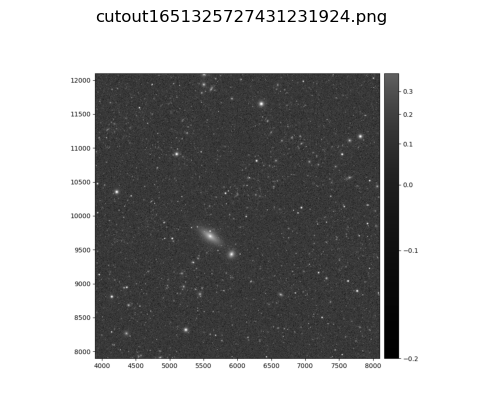

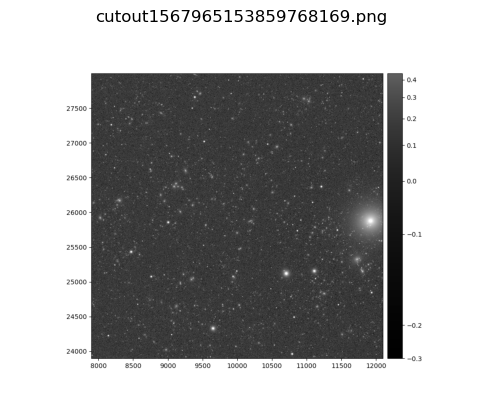

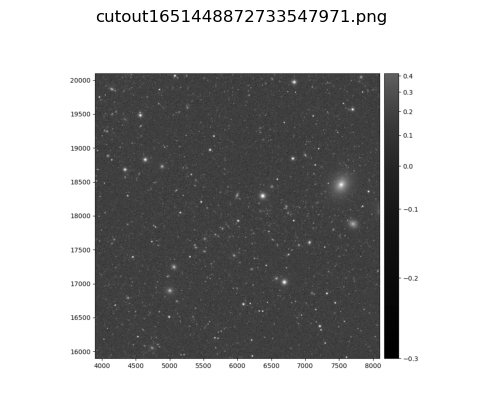

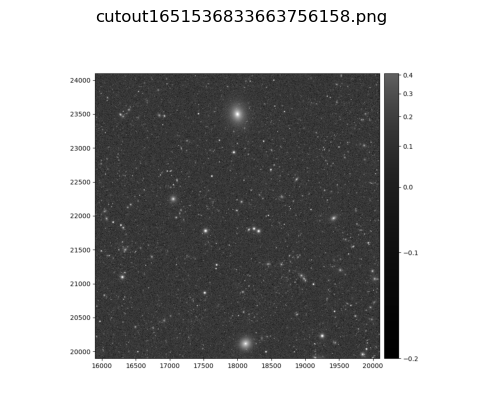

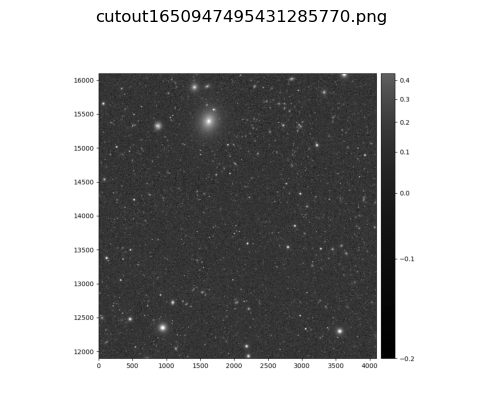

In [15]:
from matplotlib import image as mpimg

for file in os.listdir(batch_dir):
    if file == 'metadata.csv':
        continue
    plt.title(file)
    #plt.xlabel("X pixel scaling")
    #plt.ylabel("Y pixels scaling")
    image = mpimg.imread(batch_dir + file)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Option 1: Write the manifest file to the filesystem automatically

The below cell writes the `manifest.csv` file to the filesystem, which will be used by Zooniverse. 


In [16]:
manifest_path = write_manifest_file(manifest, batch_dir)

print("The manifest CSV file can be found at the following relative path:")
print(manifest_path)

The manifest CSV file can be found at the following relative path:
./cutouts/mmanifest.csv


### Option 2: Specify the path to your own manifest file
If desirable, specify the manifest CSV file manually. This is a simple matter of ensuring that it is named `metadata.csv` and placed in the `./cutouts/` folder (or whatever you renamed the `batch_dir` variable to)

### Option 3: Make your own manifest file

You are welcome to edit the automatically created manifest file (option 1) or create a new manifest file (option 2).

The manifest file _must_ abide by [RFC4180](https://datatracker.ietf.org/doc/html/rfc4180.html) as the backend service that parses the manifest file expects this format. In addition, you may have a column with no values, but there _must_ be an empty column value indicated with a comma. For example:

Valid syntax for empty column:
```
column1,column2,empty_column,column4
1,1,,4
1,1,,4
1,1,,4
```

**Important**: The manifest file must be named `manifest.csv` in order for the processing on the backend to work correctly.

## 4.0 Send the data to Zooniverse <a class="anchor" id="fifth-bullet"></a>

This cell will let you send one subject set. If you already have a set on Zooniverse, it will notify you and fail. If you want to send more data, delete what is on the Zooniverse and send again. You *may* get a warning that your set still exists or a "Could not find subject_set with id=' '" error. If so, wait (~10min) and try again, as Zooniverse takes a minute to process your changes. You may also have re-run the "Look up your project cell". Don't click the below cell multiple times, the upload will fail if multiple runs are attempted.

It has successfully worked if you get nofication and an email saying your data has been sent.

Name your subject set as it will appear on the Zooniverse. Try not to reuse names. 

In [ ]:
subject_set_name = "set_5"
send_image_data(subject_set_name, batch_dir, manifest)

## 5.0 Retrieve the data<a class="anchor" id="sixth-bullet"></a>
There are two ways to do this:
1) By directly going to your Zooniverse project and downloading the output csv files found on the 'Data Exports' tab. Click the 'Request new classification report' button and per Zooniverse: "Please note some exports may take a long time to process. We will email you when they are ready. You can only request one of each type of data export within a 24-hour time period."
2) Programatically (as we show below):

In [ ]:
# This project_id is found on Zooniverse by selecting 'build a project' and then selecting the project
# You don't need to be the project owner.
project_id = 19539
df = retrieve_data(project_id)
df